## MNIST Digit Classification
- Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required. Each image is a 28 ⇥ 28 pixel square (784 pixels total).
- 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.
- It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict.

In [38]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

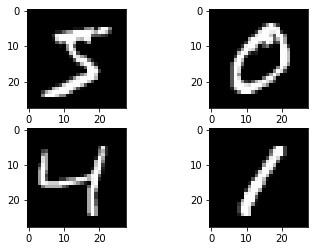

In [39]:
# Plot ad hoc mnist instances
from keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [40]:
y_test.shape

(10000,)

In [41]:
y_test[0]

7

## 1. Baseline Model with Multilayer Perceptrons or Artificial Neural Network (ANN)
- Do we really need a complex model like a convolutional neural network to get the best results with MNIST? 
- You can get good results using a very simple neural network model with a single hidden layer. 
- We will use this as a baseline for comparison to more complex convolutional neural network models.
- The training dataset is structured as a 3-dimensional array of (instance, image width and image height). 
- For a Multilayer Perceptron model we must reduce the images down into a vector of pixels. 
- In this case the 28 x 28 sized images will be 784 pixel input vectors. 
- We can do this transform easily using the reshape() function on the NumPy array.

<img src='ann.png'>

In [42]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
num_pixels

784

In [45]:
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [46]:
X_train.shape

(60000, 784)

In [47]:
X_test.shape

(10000, 784)

The pixel values are grayscale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [48]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [49]:
y_test.shape

(10000,)

In [50]:
from keras.utils.np_utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [51]:
num_classes = y_test.shape[1]
num_classes

10

## We are now ready to create our simple neural network model.
- The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). 
- A rectifier activation function is used for the neurons in the hidden layer. 
- A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. 

<img src='1.png' width=150 height=150>

In [52]:
import keras.backend as K
K.clear_session()

# create model
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=200)

Epoch 1/10
210/210 [==============================] - 3s 8ms/step - loss: 1.1502 - accuracy: 0.6802 - val_loss: 0.3491 - val_accuracy: 0.9033
Epoch 2/10
210/210 [==============================] - 2s 8ms/step - loss: 0.3227 - accuracy: 0.9119 - val_loss: 0.2732 - val_accuracy: 0.9236
Epoch 3/10
210/210 [==============================] - 2s 12ms/step - loss: 0.2555 - accuracy: 0.9285 - val_loss: 0.2356 - val_accuracy: 0.9331
Epoch 4/10
210/210 [==============================] - 1s 4ms/step - loss: 0.2201 - accuracy: 0.9367 - val_loss: 0.2160 - val_accuracy: 0.9382
Epoch 5/10
210/210 [==============================] - 1s 3ms/step - loss: 0.1890 - accuracy: 0.9463 - val_loss: 0.2021 - val_accuracy: 0.9425
Epoch 6/10
210/210 [==============================] - 1s 3ms/step - loss: 0.1709 - accuracy: 0.9499 - val_loss: 0.1910 - val_accuracy: 0.9448
Epoch 7/10
210/210 [==============================] - 1s 3ms/step - loss: 0.1600 - accuracy: 0.9546 - val_loss: 0.1789 - val_accuracy: 0.9482
Epoch

In [54]:
# Final evaluation of the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 95.42


## Try another ANN

In [55]:
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [56]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 6s 15ms/step - loss: 0.6094 - accuracy: 0.8049 - val_loss: 0.2374 - val_accuracy: 0.9276
Epoch 2/10
329/329 [==============================] - 5s 15ms/step - loss: 0.1142 - accuracy: 0.9641 - val_loss: 0.2399 - val_accuracy: 0.9190
Epoch 3/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0729 - accuracy: 0.9782 - val_loss: 0.1533 - val_accuracy: 0.9581
Epoch 4/10
329/329 [==============================] - 5s 16ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.1120 - val_accuracy: 0.9704
Epoch 5/10
329/329 [==============================] - 5s 16ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.1195 - val_accuracy: 0.9699
Epoch 6/10
329/329 [==============================] - 6s 20ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.1636 - val_accuracy: 0.9638
Epoch 7/10
329/329 [==============================] - 7s 22ms/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 0.1278 - val_accuracy: 0.9738

In [58]:
test_accuracy = model.evaluate(X_test, y_test)[1]
test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9811


0.9811000227928162

## 2. Simple Convolutional Neural Network for MNIST
- Next we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. 
- In Keras, <strong> the layers used for two-dimensional convolutions expect pixel values with the dimensions [samples][width][height][channels]. </strong>
- Note, we are forcing so-called channels-last ordering for consistency in this example. 
- <strong> In the case of RGB, the last dimension channels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. </strong>
- <strong> In the case of MNIST where the channels values are grayscale, the pixel dimension is set to 1. </strong>

<img src='cnn.png'>

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [60]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [61]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Next we define our neural network model. Convolutional neural networks are more complex than standard Multilayer Perceptrons, so we will start by using a simple structure to begin with that uses all of the elements for state-of-the-art results. 
<br>Below summarizes the network architecture.
- 1. The first hidden layer is a convolutional layer called a Conv2D. <br> The layer has 32 feature maps, with the size of 5 x 5 and a rectifier activation function.  <br> This is the input layer, expecting images with the structure outline above.
- 2. Next we define a pooling layer that takes the maximum value called MaxPooling2D. <br> It is configured with a pool size of 2 x 2.
- 3. The next layer is a regularization layer using dropout called Dropout. <br> It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
- 4. Next is a layer that converts the 2D matrix data to a vector called Flatten. <br> It allows the output to be processed by standard fully connected layers.
- 5. Next a fully connected layer with 128 neurons and rectifier activation function is used.
- 6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

<img src='2.png' width=200 height=250>

In [62]:
# define a simple CNN model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 42s 133ms/step - loss: 0.4876 - accuracy: 0.8612 - val_loss: 0.0764 - val_accuracy: 0.9761
Epoch 2/10
300/300 [==============================] - 28s 93ms/step - loss: 0.0749 - accuracy: 0.9780 - val_loss: 0.0492 - val_accuracy: 0.9841
Epoch 3/10
300/300 [==============================] - 28s 93ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0437 - val_accuracy: 0.9860
Epoch 4/10
300/300 [==============================] - 29s 96ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0375 - val_accuracy: 0.9881
Epoch 5/10
300/300 [==============================] - 24s 79ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0368 - val_accuracy: 0.9872
Epoch 6/10
300/300 [==============================] - 26s 87ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0347 - val_accuracy: 0.9885
Epoch 7/10
300/300 [==============================] - 28s 93ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0379 - val_accuracy

In [64]:
# Final evaluation of the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.82


## 3. Larger Convolutional Neural Network for MNIST
- This time we define a larger CNN architecture with additional convolutional, max pooling layers and fully connected layers. The network topology can be summarized as follows.
<br> 1. Convolutional layer with 30 feature maps of size 5 x 5. 
<br> 2. Pooling layer taking the max over 2 x 2 patches.
<br> 3. Convolutional layer with 15 feature maps of size 3 x 3. 
<br> 4. Pooling layer taking the max over 2 x 2 patches.
<br> 5. Dropout layer with a probability of 20%.
<br> 6. Flatten layer.
<br> 7. Fully connected layer with 128 neurons and rectifier activation. 
<br> 8. Fully connected layer with 50 neurons and rectifier activation. 
<br> 9. Output layer.

<img src='3.png' width=200 height=250>

In [65]:
# Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation= 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation= 'relu' ))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(50, activation= 'relu' ))
model.add(Dense(num_classes, activation= 'softmax' ))
# Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
300/300 [==============================] - 34s 111ms/step - loss: 0.8537 - accuracy: 0.7322 - val_loss: 0.0837 - val_accuracy: 0.9738
Epoch 2/10
300/300 [==============================] - 32s 107ms/step - loss: 0.1076 - accuracy: 0.9685 - val_loss: 0.0477 - val_accuracy: 0.9845
Epoch 3/10
300/300 [==============================] - 40s 132ms/step - loss: 0.0697 - accuracy: 0.9787 - val_loss: 0.0359 - val_accuracy: 0.9877
Epoch 4/10
300/300 [==============================] - 85s 284ms/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 0.0309 - val_accuracy: 0.9889
Epoch 5/10
300/300 [==============================] - 147s 492ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0325 - val_accuracy: 0.9897
Epoch 6/10
300/300 [==============================] - 103s 344ms/step - loss: 0.0413 - accuracy: 0.9872 - val_loss: 0.0301 - val_accuracy: 0.9894
Epoch 7/10
300/300 [==============================] - 94s 313ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0282 - val_